SED for 70 Oph B as a proxy for NGTS 10 - lots of it can come from STARCAT and LOWLIB 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel, Gaussian1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/70ophB/'
starfile ='h_hd165341_uvsum_1x_51779_spc.fits'
ngslfile =  'h_stis_ngsl_hd165341_v1.fits' #not in lowlib for some reason~

In [8]:
tspec = fits.getdata('{}{}'.format(path, starfile), 1)[0]
w_uv, f_uv, e_uv = tspec['WAVE'], tspec['FLUX'], tspec['ERROR']

ngspec = fits.getdata('{}{}'.format(path, ngslfile), 1)
w_opt, f_opt, e_opt = ngspec['WAVELENGTH'], ngspec['FLUX_UNRED'], ngspec['STATERR']


(1e-14, 1e-10)

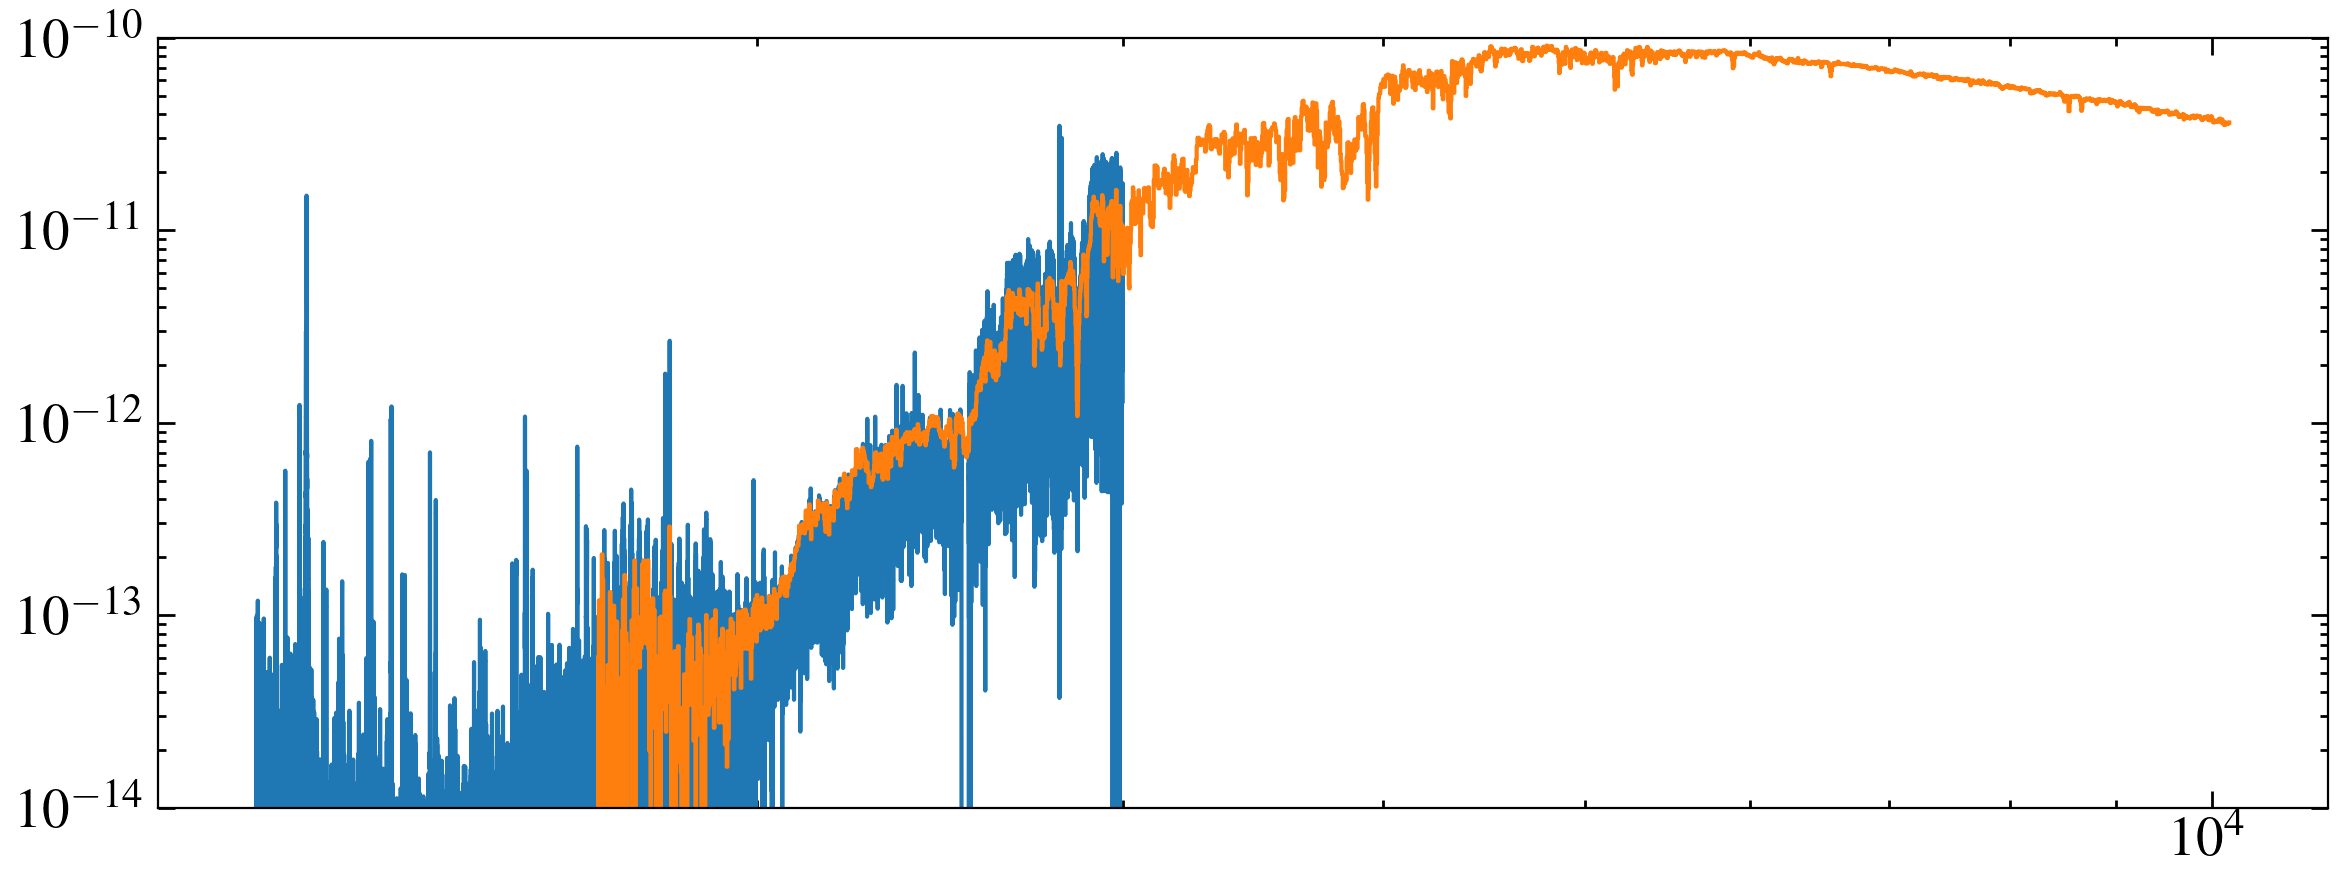

In [15]:
fig, ax = plt.subplots()

ax.step(w_uv, f_uv, where='mid')
ax.step(w_opt, f_opt, where='mid')
# ax.step(w_opt, ngspec['FLUX'], where='mid')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-14, 1e-10)

(0.0, 5e-11)

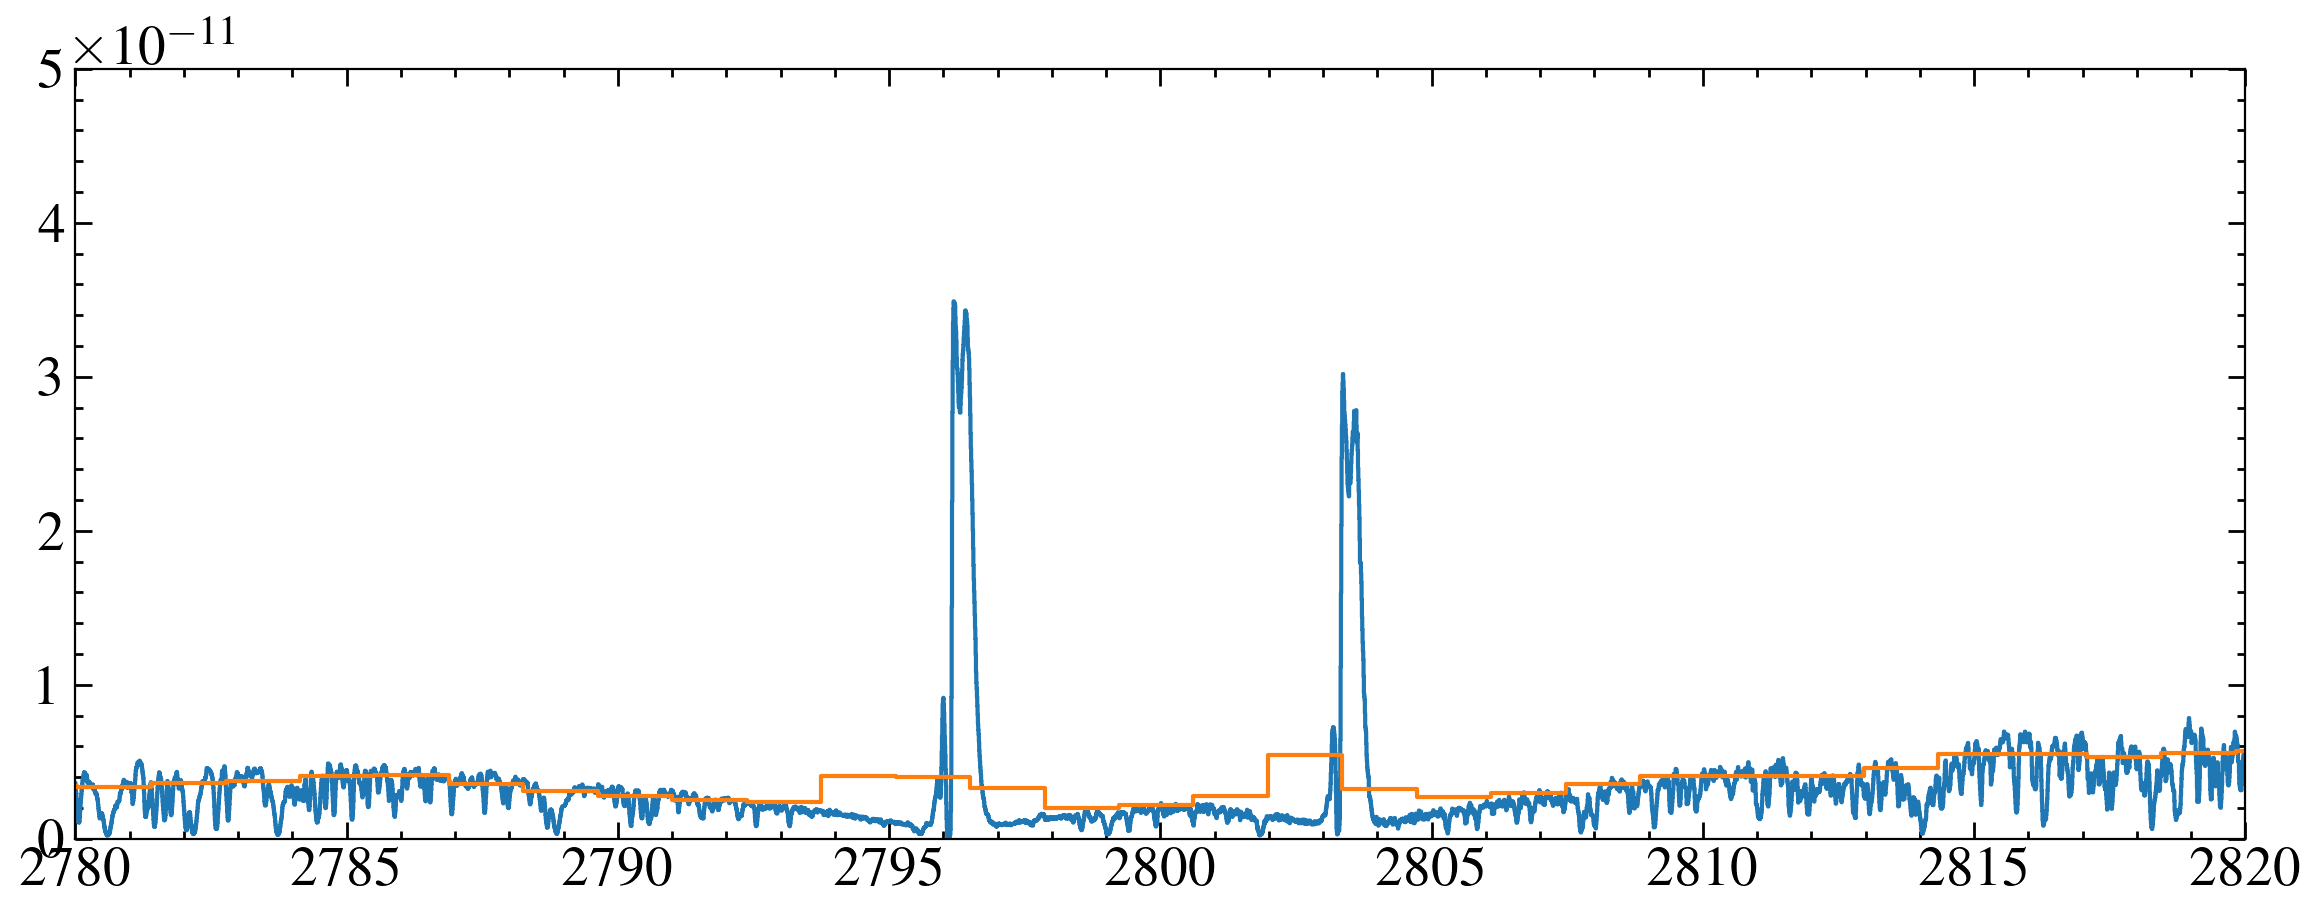

In [19]:
fig, ax = plt.subplots()

ax.step(w_uv, f_uv, where='mid')
ax.step(w_opt, f_opt, where='mid')
# ax.step(w_opt, ngspec['FLUX'], where='mid')

# ax.set_yscale('log')
# ax.set_xscale('log')

# ax.set_ylim(1e-14, 1e-10)
ax.set_xlim(2780, 2820)
ax.set_ylim(0, 5e-11)

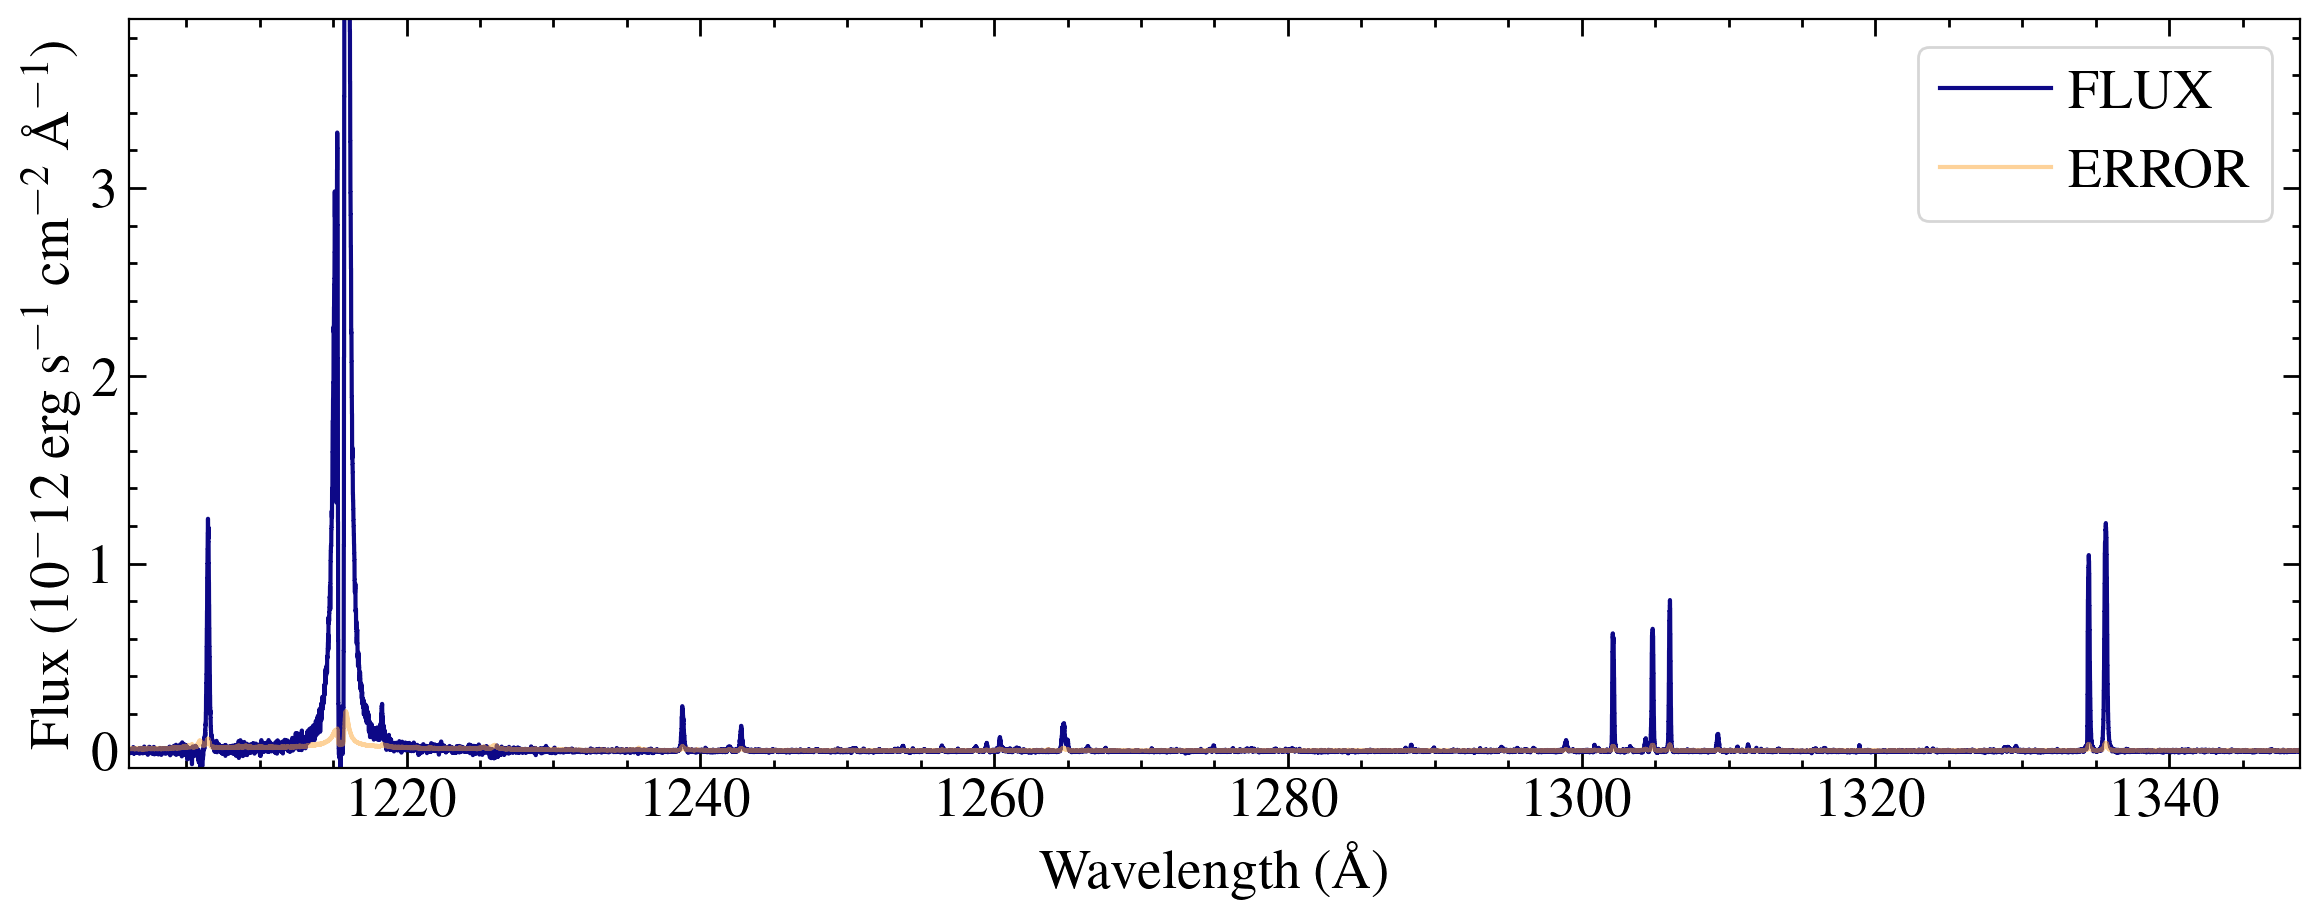

In [46]:


fig, ax = plt.subplots(figsize=(12, 5))

scale = 1e12

ax.step(w_uv, f_uv*scale, where='mid', label='FLUX', c= plt.cm.plasma(0))
ax.step(w_uv, e_uv*scale, where='mid', alpha=0.5, label ='ERROR', c= plt.cm.plasma(0.8))

ax.set_ylim(-0.09, 3.9)
ax.set_xlim(1201.1, 1348.9)
# ax.set_ylim(-0.09, 16.9)
# ax.set_xlim(1213.1, 1218.9)


ax.legend(frameon=True)

ax.set_ylabel('Flux (10$^-12$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

ax.set_xlabel('Wavelength (\AA)')



fig.tight_layout()

Add Starcat already implemented, could make an add lowlib/ngsl routine later